In [48]:
## We import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
pd.pandas.set_option('display.max_columns', None)

In [50]:
## We read our data

data = pd.read_csv('../input/melanoma-tumor-size-prediction-machinehack/Train.csv')

In [19]:
## We check our numeric features

data.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [20]:
## There are no missing values

data.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [21]:
## We check for correlations. Tumor size is highly correlated with malign ratio

data.corr()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
mass_npea,1.000000,0.907335,0.123411,0.930691,0.998167,0.968006,0.617207,0.654849,-0.901106,-0.004679
size_npear,0.907335,1.000000,0.499398,0.794096,0.903502,0.907932,0.570343,0.593019,-0.791768,0.164761
malign_ratio,0.123411,0.499398,1.000000,0.029167,0.119389,0.196430,0.081228,0.102475,-0.068605,0.374273
damage_size,0.930691,0.794096,0.029167,1.000000,0.925266,0.938202,0.535834,0.676904,-0.892006,-0.163804
exposed_area,0.998167,0.903502,0.119389,0.925266,1.000000,0.962462,0.617149,0.646444,-0.900717,-0.003641
std_dev_malign,0.968006,0.907932,0.196430,0.938202,0.962462,1.000000,0.597842,0.667264,-0.884481,-0.030085
err_malign,0.617207,0.570343,0.081228,0.535834,0.617149,0.597842,1.000000,0.381454,-0.583945,0.004484
malign_penalty,0.654849,0.593019,0.102475,0.676904,0.646444,0.667264,0.381454,1.000000,-0.646893,0.011871
damage_ratio,-0.901106,-0.791768,-0.068605,-0.892006,-0.900717,-0.884481,-0.583945,-0.646893,1.000000,0.054892
tumor_size,-0.004679,0.164761,0.374273,-0.163804,-0.003641,-0.030085,0.004484,0.011871,0.054892,1.000000


In [22]:
## We define a function to create diagnostic plots to check and correct for skewness

import scipy.stats as stats
def diagnostic_plots(df, variable): 
    plt.figure(figsize=(15,6)) 
    plt.subplot(1, 2, 1) 
    df[variable].hist(bins = 25) 
    plt.subplot(1, 2, 2) 
    stats.probplot(df[variable], dist="norm", plot=plt) 
    plt.show()


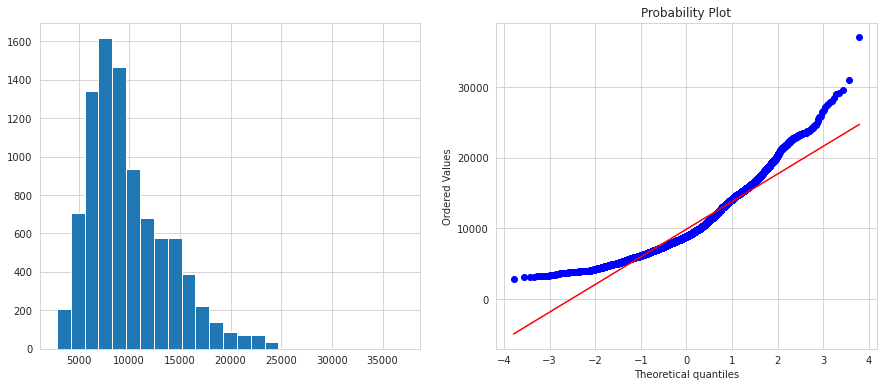

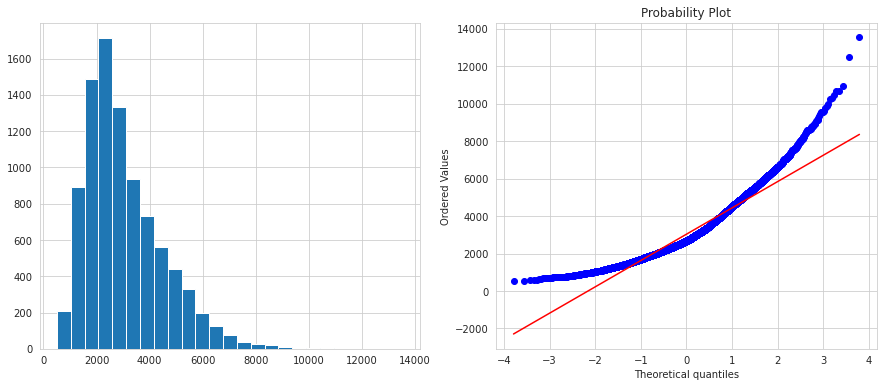

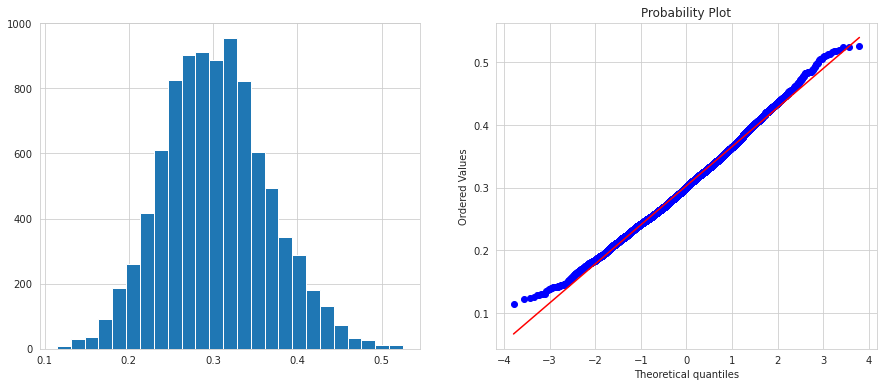

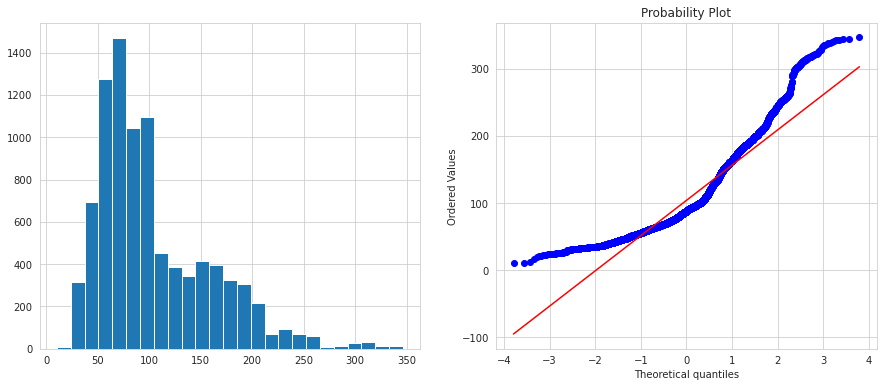

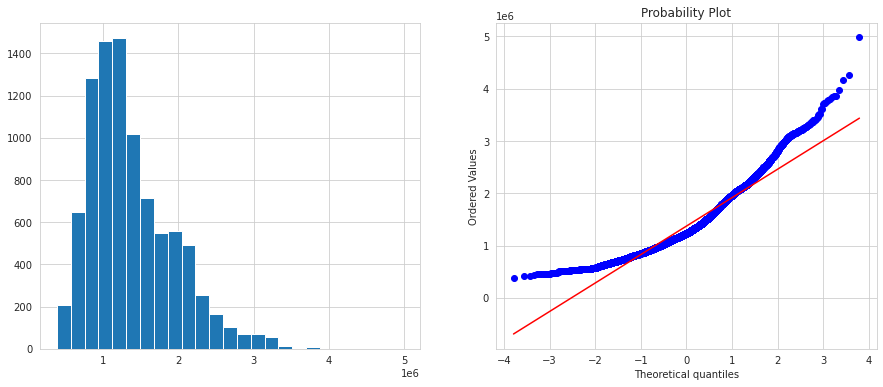

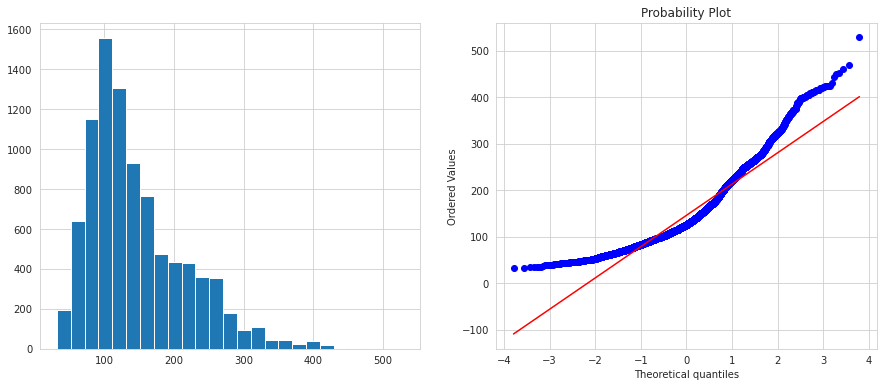

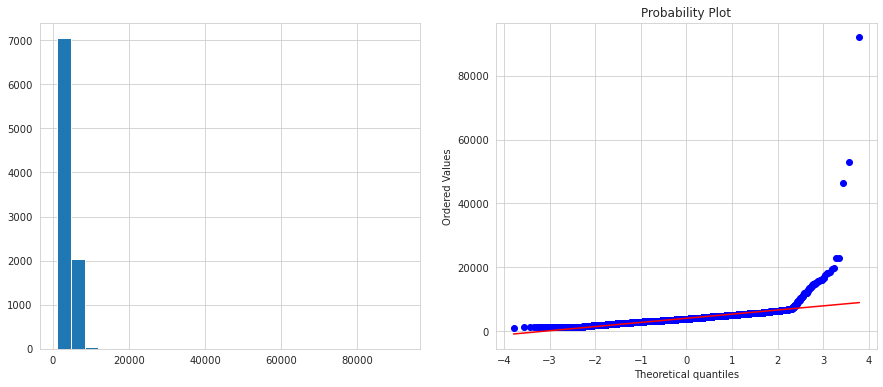

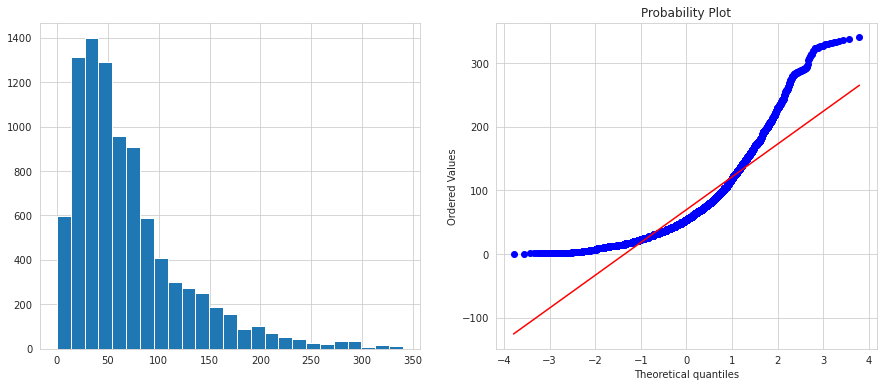

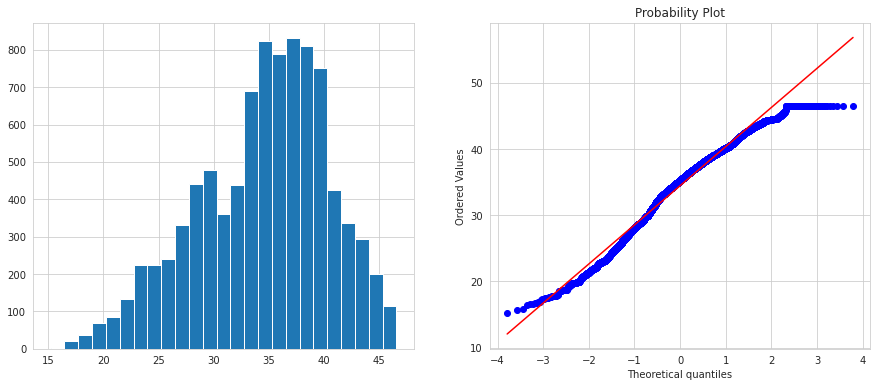

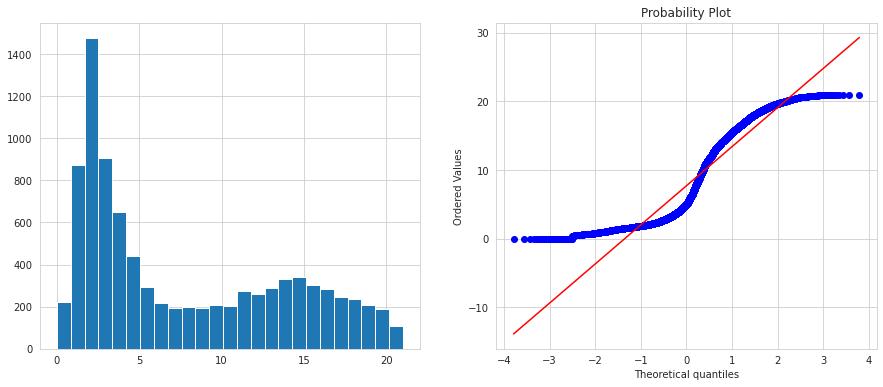

In [23]:
for feature in data:
    diagnostic_plots(data, feature)

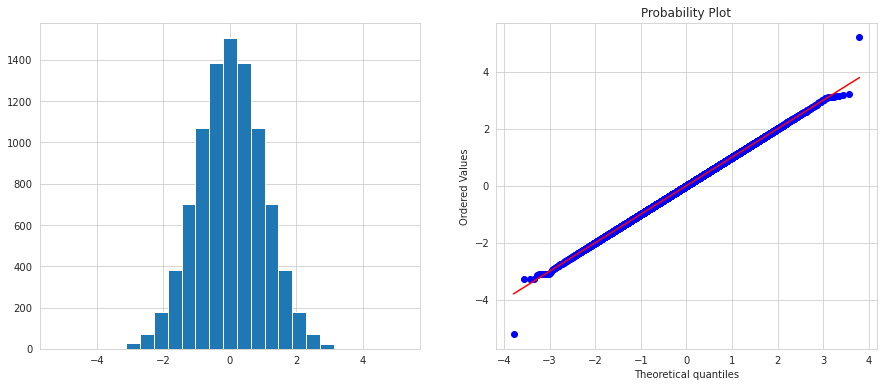

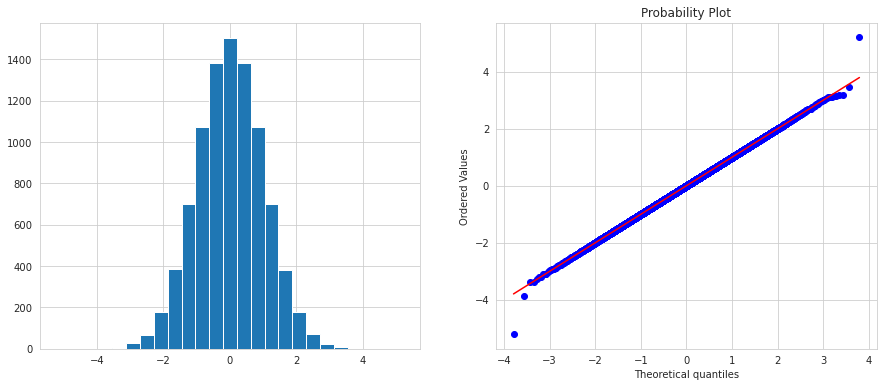

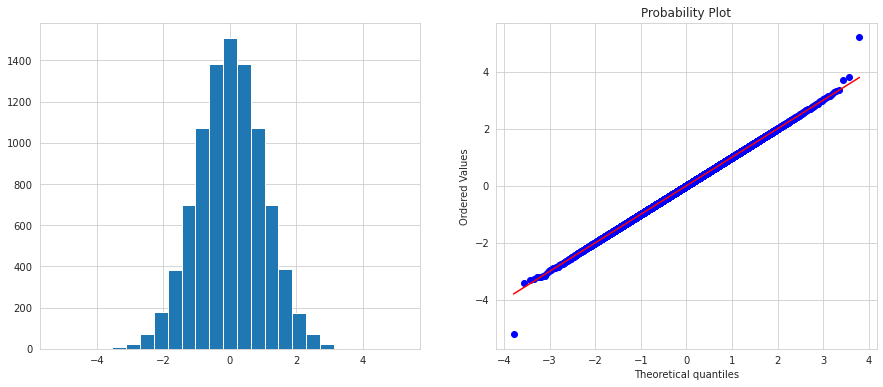

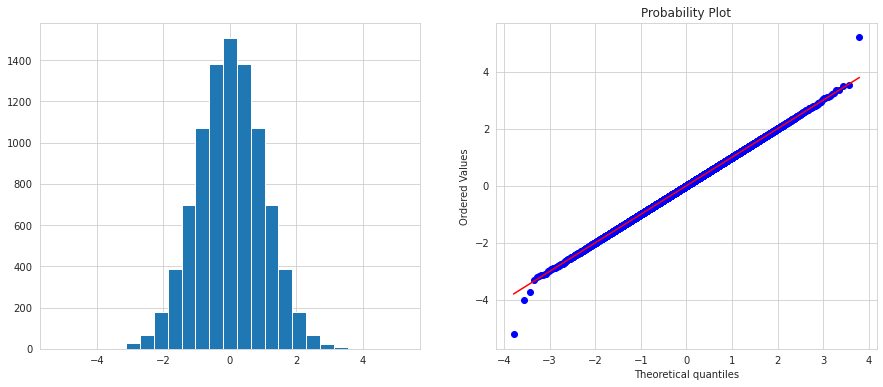

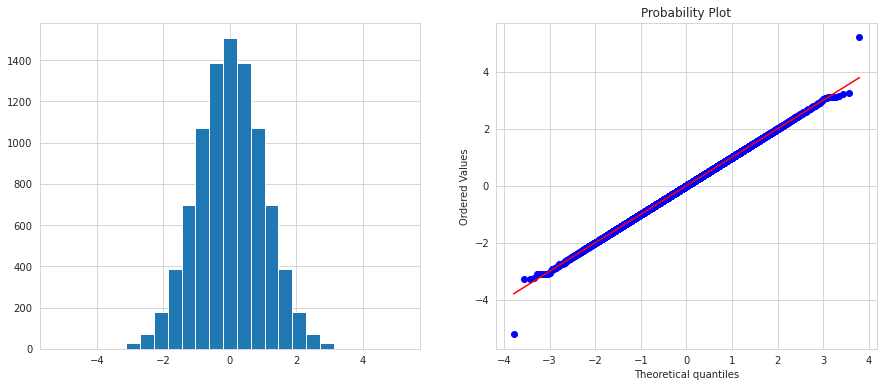

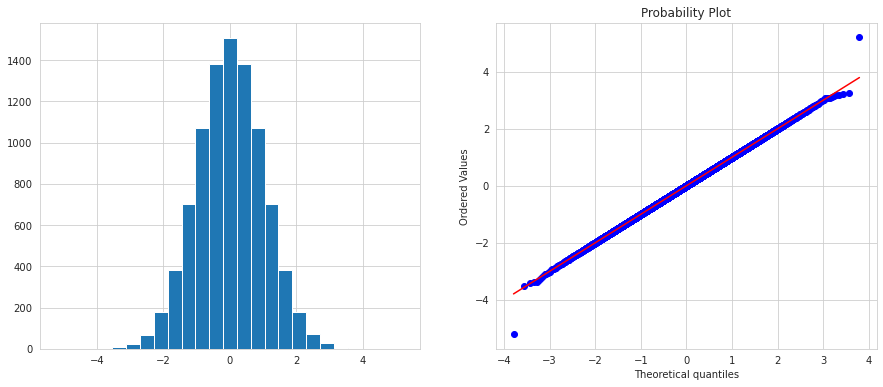

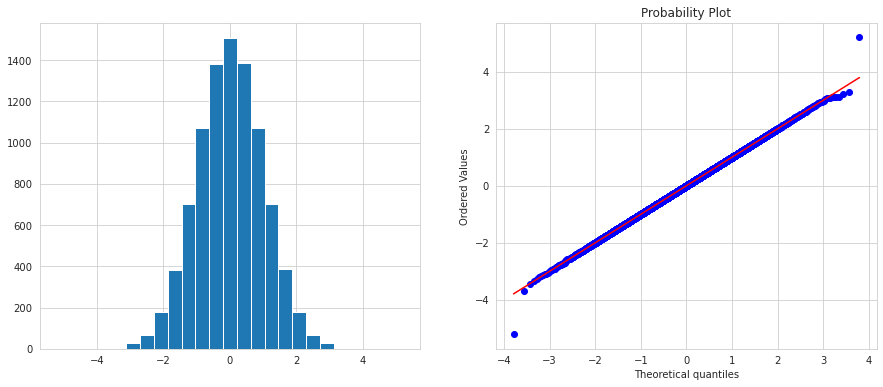

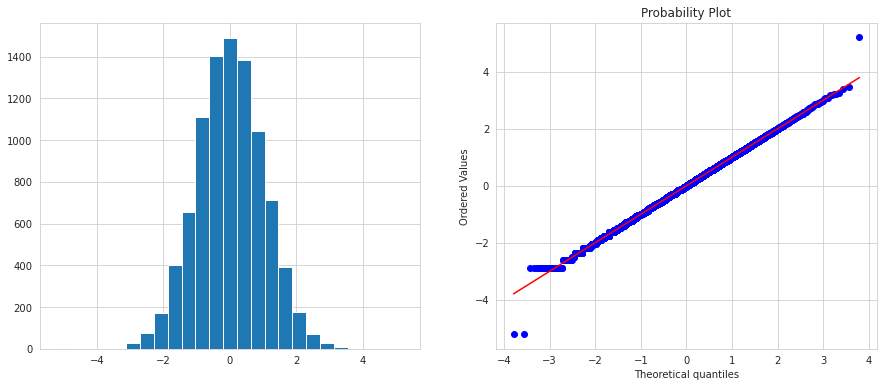

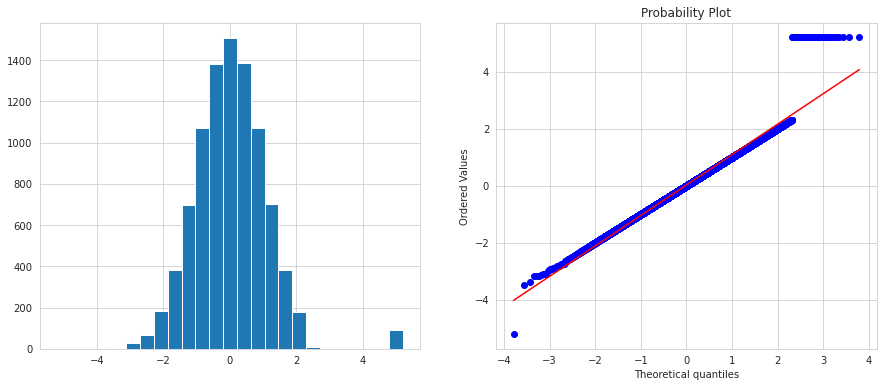

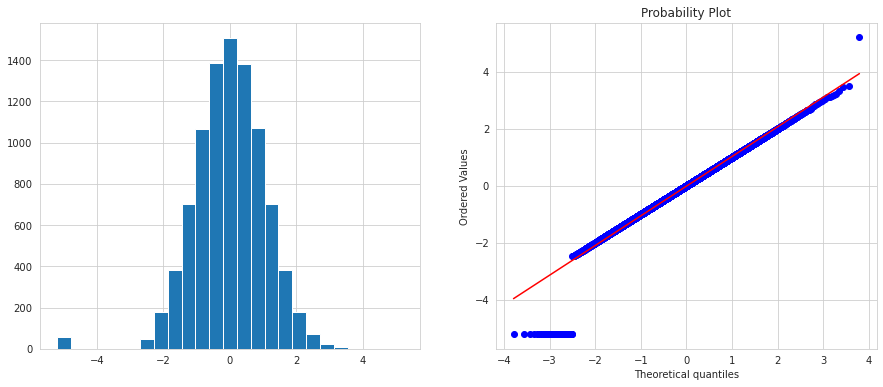

In [33]:
## We correct the skewness using quantile transformer and check our results

data1 = data.copy()
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
scaler.fit(data1)
scaled_features = scaler.transform(data1)
df_feat = pd.DataFrame(scaled_features,columns=data1.columns)

for feature in data:
    diagnostic_plots(df_feat, feature)

In [ ]:
## We take log of size_npear to fix skewness

data1 = data.copy()
data1['size_npear']=np.log(data1['size_npear'])
diagnostic_plots(data1,'size_npear')

In [ ]:
## We try boxcox transform the tumor_size to fix skewness

data1 = data.copy()
data1['tumor_size_boxcox'], param = stats.boxcox(data1['tumor_size']+1)
diagnostic_plots(data1, 'tumor_size_boxcox')
plt.show()

In [ ]:
## We take 10th root of tumor_size to fix skewness

data1 = data.copy()
data1['tumor_size']=data1['tumor_size']**(1/10)
diagnostic_plots(data1, 'tumor_size')
plt.show()

In [31]:
## We now create a new dataframe with skewness fixed

data1 = data.copy()
data1['mass_npea']=np.log(data1['mass_npea'])
data1['size_npear']=np.log(data1['size_npear'])
data1['exposed_area']=np.log(data1['exposed_area'])
data1['damage_size']=data['damage_size']**(1/5)
data1['std_dev_malign']=np.log(data1['std_dev_malign'])
data1['malign_penalty']=data1['malign_penalty']**(1/3)

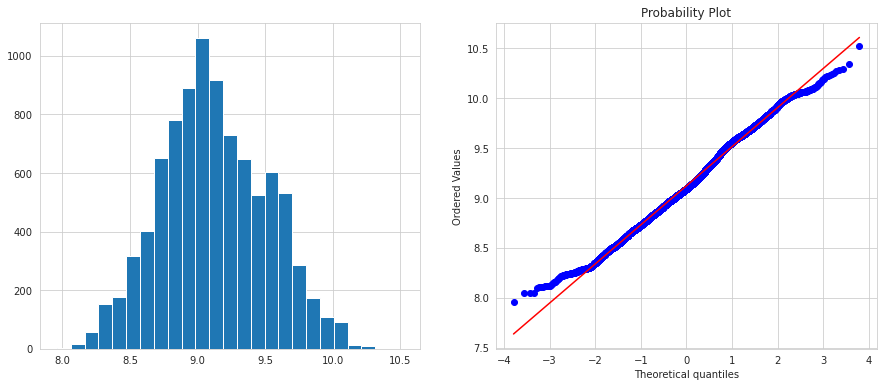

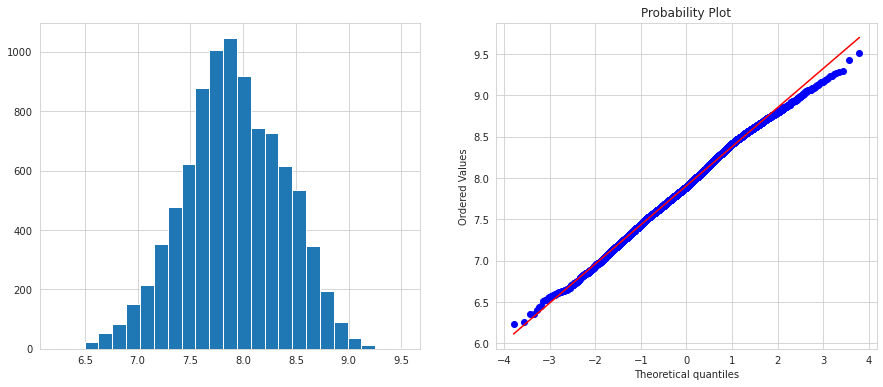

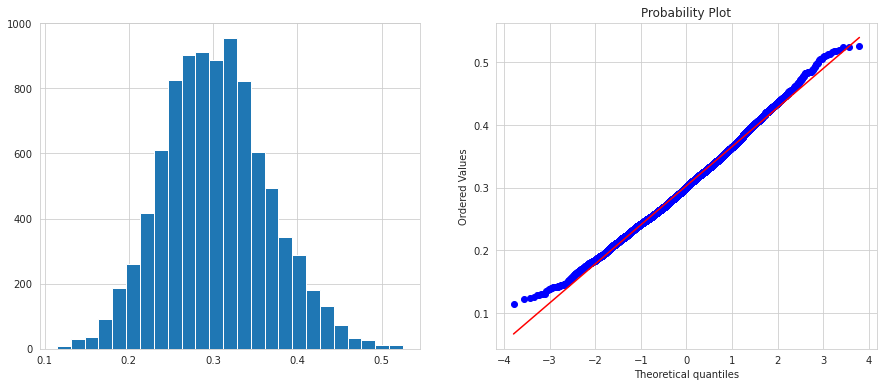

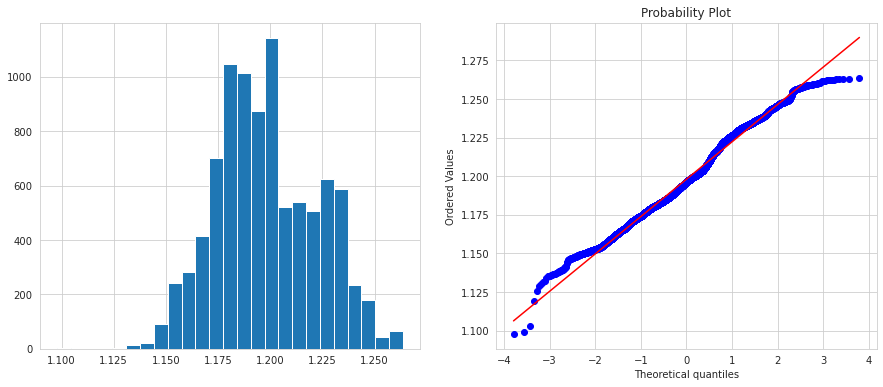

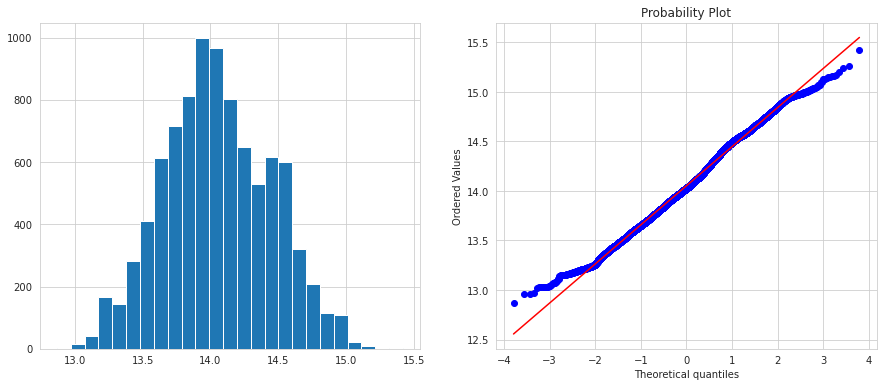

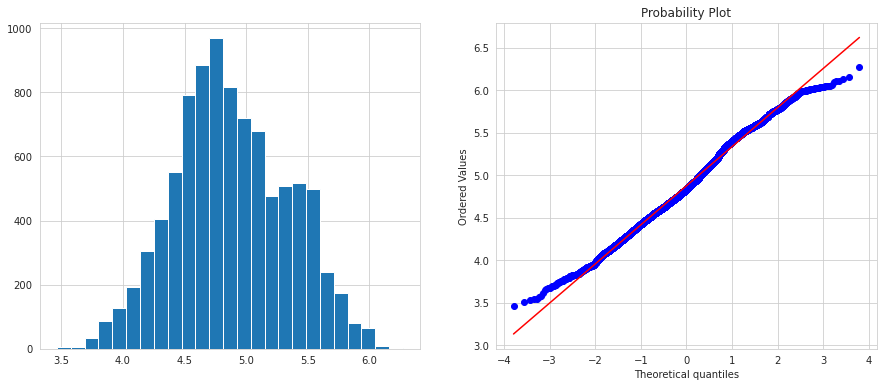

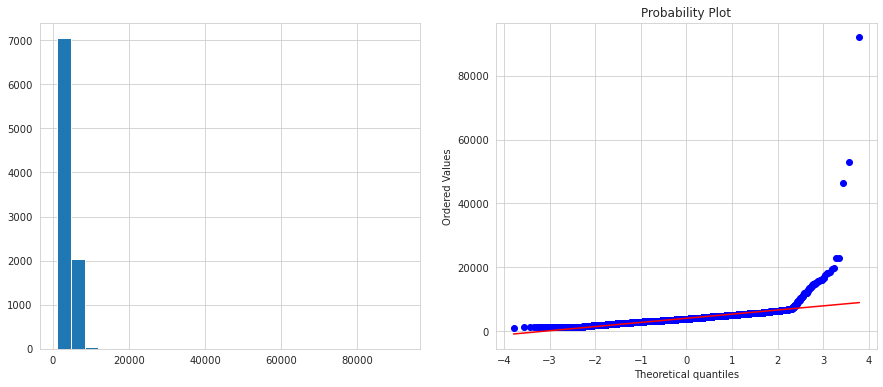

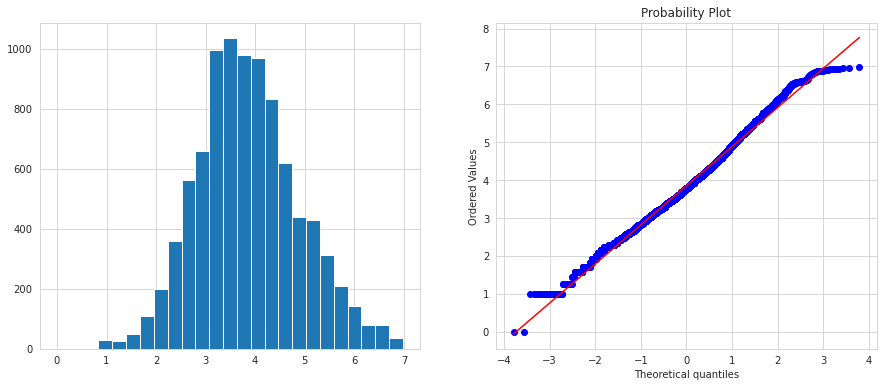

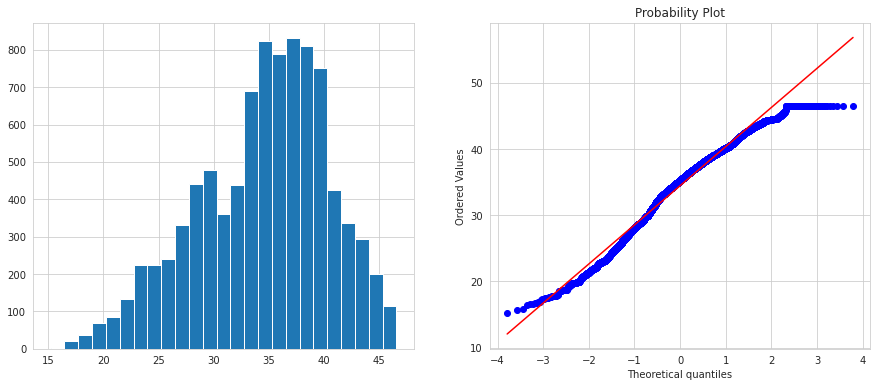

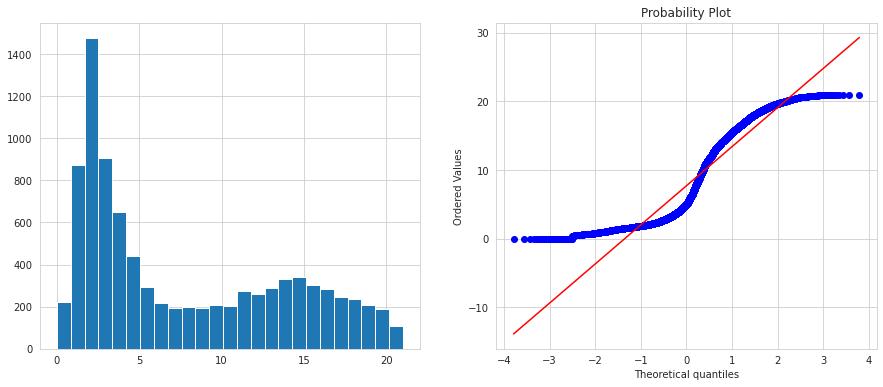

In [32]:
## Now we see that our data approximately follows normal distribution

for feature in data1:
    diagnostic_plots(data1, feature)

In [37]:
## We define our features and target now

x = df_feat.drop('tumor_size', axis = 1)
y = df_feat['tumor_size']

[0.07520752 0.0837811  0.19218251 0.16371342 0.07940241 0.10015585
 0.08923635 0.13134814 0.0849727 ]


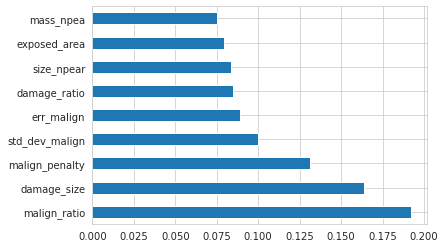

In [41]:
## We check feature importance using extratree regressor

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [61]:
## We check feature importance using lasso

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(x, y)
selected_feat = x.columns[(feature_sel_model.get_support())]
selected_feat.values

array(['mass_npea', 'malign_ratio', 'damage_size', 'std_dev_malign',
       'err_malign', 'malign_penalty', 'damage_ratio'], dtype=object)

In [53]:
## We check for VIF scores to check for multi-collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
vif_scores(x)

,Independent Features,VIF Scores
0,mass_npea,236485.210553
1,size_npear,57037.041398
2,malign_ratio,1014.377894
3,damage_size,21038.227945
4,exposed_area,166302.141610
5,std_dev_malign,2936.620014
6,err_malign,10.002256
7,malign_penalty,26.270519
8,damage_ratio,208.565688


In [62]:
## We create a copy of our features and drop redundant columns

x1 = x.copy()
x1 = x1.drop(['size_npear', 'exposed_area', 'mass_npea'], axis = 1)

In [63]:
## We now see that VIF scores have decreased

vif_scores(x1)

,Independent Features,VIF Scores
0,malign_ratio,30.645553
1,damage_size,1699.822400
2,std_dev_malign,1063.225473
3,err_malign,9.669027
4,malign_penalty,26.069813
5,damage_ratio,165.297208


In [35]:
## We scale our numeric data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)
x2 = pd.DataFrame(scaled_features,columns=x.columns)

Text(0, 0.5, 'cumulative explained variance')

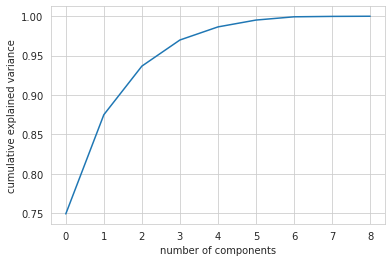

In [38]:
## We now apply PCA to find the right amount of n_components. We see that 6 components explain most of the variance

from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [39]:
## We transform using PCA

pca = PCA(n_components = 6)
pca.fit(x)
x1 = pca.transform(x)

In [43]:
## We create a fataframe of our transformed features

x1 = pd.DataFrame(x1)

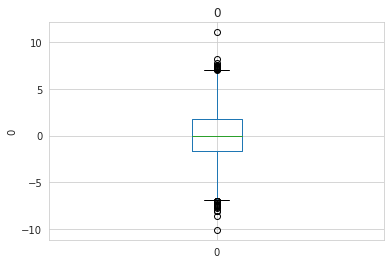

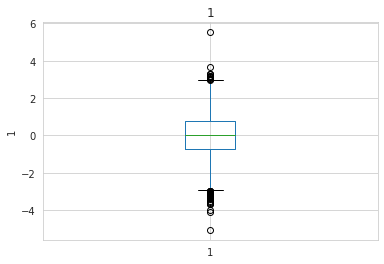

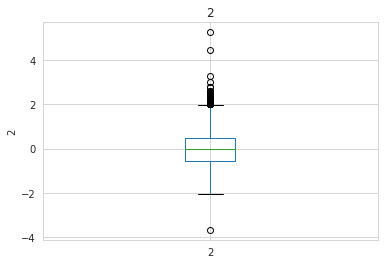

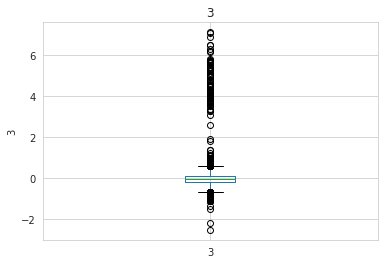

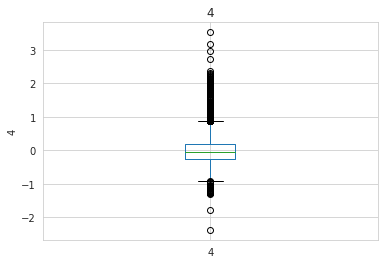

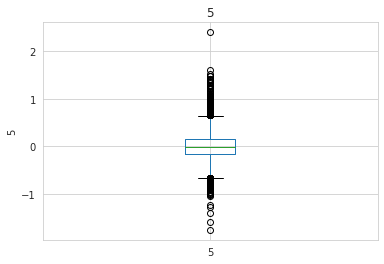

In [45]:
## Now we check for outliers

for feature in x1:
    x1.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [47]:
## We now fir xgboost model and check our RMSE

from sklearn.model_selection import KFold, cross_val_score, train_test_split
def rmsle_cv(model):
    kf = KFold(10, shuffle=True, random_state=42).get_n_splits(x1.values)
    rmse= np.sqrt(-cross_val_score(model, x1, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.7906 (0.0373)



In [ ]:
## We see that no tumor sizes are less that 0.4. 
## This means tumors of sizes less than 0.4 are not detectable

len(data[data['tumor_size'] < 0.4])

In [ ]:
## We now train our model on other ML algorithms and check our score

x = data1.drop('tumor_size', axis = 1)
y = data1.tumor_size

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_features = scaler.transform(x_train)
x_train = pd.DataFrame(scaled_features,columns=x_train.columns)


In [ ]:
scaled_features = scaler.transform(x_test)
x_test = pd.DataFrame(scaled_features,columns=x_test.columns)

In [ ]:
pred = model_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,pred))

In [ ]:
def rmsle_cv(model):
    kf = KFold(10, shuffle=True, random_state=42).get_n_splits(x.values)
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


In [ ]:

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [ ]:

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [ ]:

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))